In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



from sklearn.metrics import mean_squared_error 

In [3]:
#Step 1: Create linear regression model and train on prepandemic times
dataset = pd.read_csv("prepan_with2020Q1.csv")
weekday_map = {'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6, 'Sunday':7}
dataset['weekday_num']=dataset['Weekday'].map(weekday_map)

dataset

X = dataset[['Month','Hour','STATION ID', 'weekday_num']].copy()
y = dataset['CHANGE']
X

#for some reason it's throwing an error about nas so I replaced them with 0s

print(y.isna().sum())
y.fillna(0, inplace=True)


#RANDOMISED SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#REGRESSION
reg = LinearRegression().fit(X_train,y_train)


#Predict change based on factors
fitted_train = reg.predict(X_train)
fitted_test = reg.predict(X_test) 




#Performance metrics

MSE = mean_squared_error(y_test, fitted_test)
print('Mean Squared Error, testing set:', MSE)

MSE = mean_squared_error(y_train, fitted_train)
print('Mean Squared Error, training set:', MSE)

#Pretty low mean sq error which is promising

#Save your model
import joblib
joblib.dump(reg, 'model')


dataset


2571
Mean Squared Error, testing set: 2.2365852243579227
Mean Squared Error, training set: 2.03184360523466


,STATION ID,TIME,CHANGE,Year,Month,Day,Weekday,Hour,Unnamed: 0,weekday_num
0,69,2018-10-01 00:00:00,0.000000,2018,10,1,Monday,0,NaN,1
1,69,2018-10-01 01:00:00,0.778499,2018,10,1,Monday,1,NaN,1
2,69,2018-10-01 02:00:00,0.000000,2018,10,1,Monday,2,NaN,1
3,69,2018-10-01 03:00:00,0.000000,2018,10,1,Monday,3,NaN,1
4,69,2018-10-01 04:00:00,6.932576,2018,10,1,Monday,4,NaN,1
...,...,...,...,...,...,...,...,...,...,...
42655,98,2020-04-01 19:00:00,0.000000,2020,4,1,Wednesday,19,6601.0,3
42656,98,2020-04-01 20:00:00,0.000000,2020,4,1,Wednesday,20,6602.0,3
42657,98,2020-04-01 21:00:00,0.000000,2020,4,1,Wednesday,21,6603.0,3
42658,98,2020-04-01 22:00:00,0.000000,2020,4,1,Wednesday,22,6604.0,3


       Unnamed: 0.1  Unnamed: 0  STATION ID                 TIME  CHANGE  \
0                 0           0          69  2020-04-01 00:00:00     0.0   
1                 1           1          69  2020-04-01 01:00:00     0.0   
2                 2           2          69  2020-04-01 02:00:00     0.0   
3                 3           3          69  2020-04-01 03:00:00     0.0   
4                 4           4          69  2020-04-01 04:00:00     0.0   
...             ...         ...         ...                  ...     ...   
20011          6691        6691          98  2021-01-01 19:00:00     0.0   
20012          6692        6692          98  2021-01-01 20:00:00     0.0   
20013          6693        6693          98  2021-01-01 21:00:00     0.0   
20014          6694        6694          98  2021-01-01 22:00:00     0.0   
20015          6695        6695          98  2021-01-01 23:00:00     0.0   

       Year  Month  Day    Weekday  Hour  weekday_num  predicted usage  
0      2020   

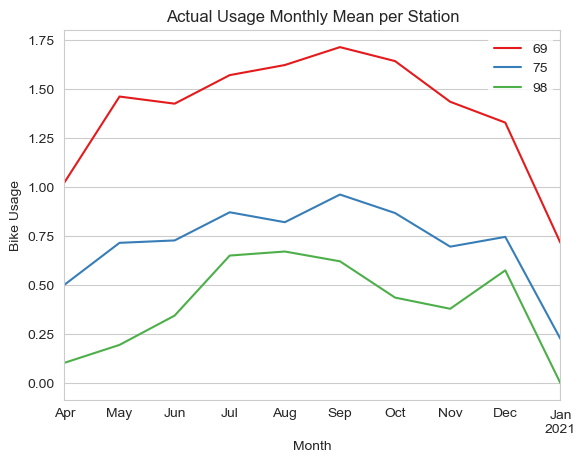

STATION ID                 69        75        98
datetime                                         
2020-04-01 05:00:00  1.204458  1.043153  0.424817
2020-04-01 06:00:00  1.233336  1.072031  0.453694
2020-04-01 07:00:00  1.262213  1.100908  0.482572
2020-04-01 08:00:00  1.291091  1.129786  0.511449
2020-04-01 09:00:00  1.319968  1.158663  0.540327
...                       ...       ...       ...
2021-01-01 18:00:00  1.420434  1.259129  0.640793
2021-01-01 19:00:00  1.449311  1.288006  0.669670
2021-01-01 20:00:00  1.478189  1.316884  0.698547
2021-01-01 21:00:00  1.507066  1.345761  0.727425
2021-01-01 22:00:00  1.535944  1.374639  0.756302

[4968 rows x 3 columns]


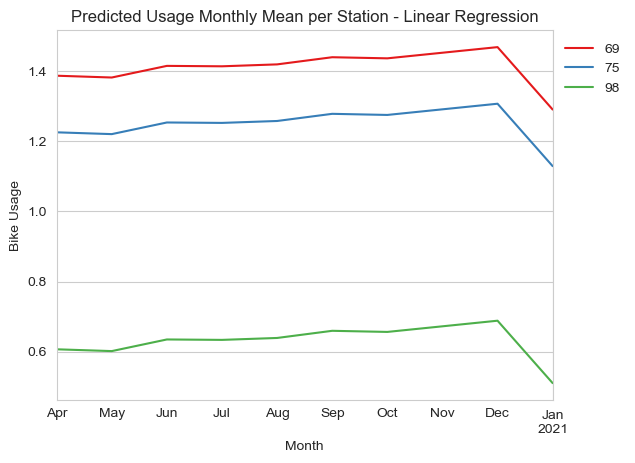

In [6]:
#Step 2
##Predicting Pandemic Values
#Load your model

model = joblib.load('model')


dataset2 = pd.read_csv("2020NEWCOMBINED.csv")

weekday_map = {'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6, 'Sunday':7}
dataset2['weekday_num']=dataset2['Weekday'].map(weekday_map)

X2 = dataset2[['Month','Hour','STATION ID', 'weekday_num']].copy()


X2



#Predict your variable using the regression model
y_pred = model.predict(X2)

#Append to your dataframe

predicted_df = pd.DataFrame(index=X2.index)
predicted_df['predicted usage'] = y_pred

dataset2 = pd.concat([dataset2, predicted_df], axis = 1)

print(dataset2)



#Pivoting tables to compare accross stations with means. Created a usage and predicted usage one.


dataset2["datetime"] = pd.to_datetime(dataset2["TIME"])

usage = dataset2.pivot_table(index='datetime', columns='STATION ID', values='CHANGE', aggfunc='mean')
predicted_usage = dataset2.pivot_table(index='datetime', columns='STATION ID', values='predicted usage', aggfunc='mean')


# Remove nighttime rows where nothing's happening
usage = usage.between_time('05:00', '22:00')
print(usage)


#Plotting the actual usage daily mean and monthly mean during pandemic


monthlymean = usage.resample("M").mean()
monthlymean.plot()
legend = plt.legend()
legend.set_bbox_to_anchor((1,1))
legend.get_frame().set_linewidth(0.0)
plt.title("Actual Usage Monthly Mean per Station")
plt.xlabel("Month")
plt.ylabel("Bike Usage")

plt.savefig('Actual_Usage_MonthlyMeanperStation.png')

plt.show()


# Remove nighttime rows where nothing's happening
predicted_usage = predicted_usage.between_time('05:00', '22:00')
print(predicted_usage)



#Plotting the predicted usage daily mean and monthly mean during pandemic


monthlymeanPU = predicted_usage.resample("M").mean()
monthlymeanPU.plot()
legend = plt.legend()
legend.set_bbox_to_anchor((1,1))
legend.get_frame().set_linewidth(0.0)
plt.title("Predicted Usage Monthly Mean per Station - Linear Regression")
plt.xlabel("Month")
plt.ylabel("Bike Usage")

plt.savefig('Predicted_Usage_MonthlyMeanperStation.png')

plt.show()







In [ ]:
##if you want to use time
#X['TIME']=pd.to_datetime(X['TIME'])

#X['TIME']=X['TIME'].apply(lambda x: (x - datetime.datetime(1970,1,1,)).total_seconds())
#X2['TIME']=pd.to_datetime(X2['TIME'])

#X2['TIME']=X2['TIME'].apply(lambda x: (x - datetime.datetime(1970,1,1,)).total_seconds())

#train['TIME']=pd.to_datetime(train['TIME'])

#train['TIME']=train['TIME'].apply(lambda x: (x - datetime.datetime(1970,1,1,)).total_seconds())

#test['TIME']=pd.to_datetime(test['TIME'])

#test['TIME']=test['TIME'].apply(lambda x: (x - datetime.datetime(1970,1,1,)).total_seconds())




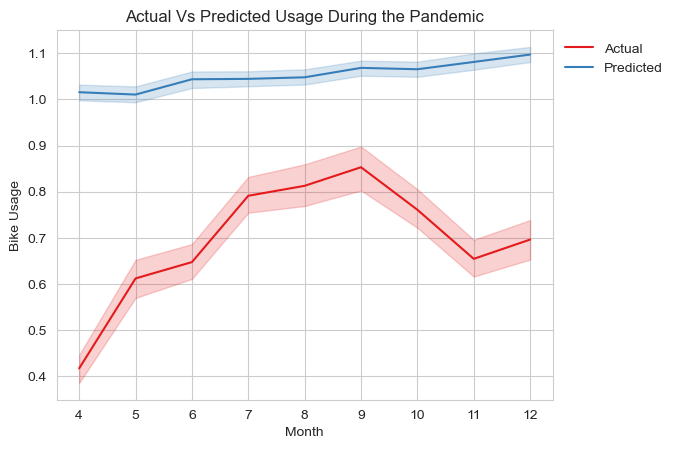

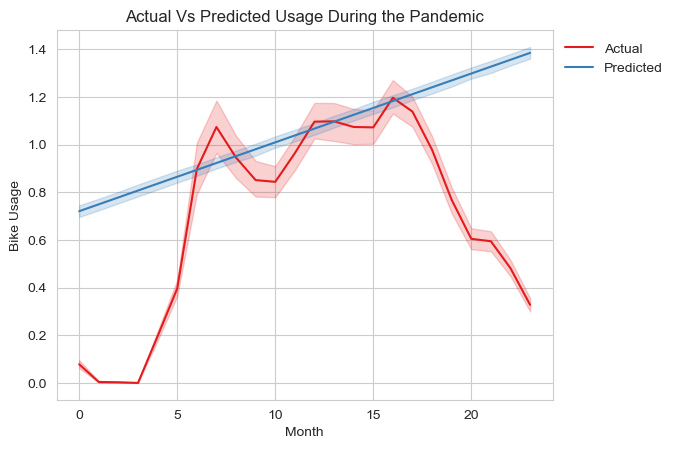

In [7]:
##Step 3: Compare real and predicted values

import seaborn as sns

sns.set_style('whitegrid')

sns.set_palette('Set1')

dataset2 = dataset2[dataset2['Month'] != 1]

sns.lineplot(x='Month', y = 'CHANGE', data = dataset2, label = 'Actual')
sns.lineplot(x='Month', y = 'predicted usage', data = dataset2, label = 'Predicted')
legend = plt.legend()
legend.set_bbox_to_anchor((1,1))
legend.get_frame().set_linewidth(0.0)
plt.title("Actual Vs Predicted Usage During the Pandemic")
plt.xlabel("Month")
plt.ylabel("Bike Usage")

plt.savefig('ActualVPredicted_DuringPandemicYear.png')

plt.show()

sns.lineplot(x='Hour', y = 'CHANGE', data = dataset2, label = 'Actual')
sns.lineplot(x='Hour', y = 'predicted usage', data = dataset2, label = 'Predicted')
legend = plt.legend()
legend.set_bbox_to_anchor((1,1))
legend.get_frame().set_linewidth(0.0)
plt.title("Actual Vs Predicted Usage During the Pandemic")
plt.xlabel("Month")
plt.ylabel("Bike Usage")

plt.savefig('ActualVPredicted_DuringPandemicYear.png')

plt.show()


In [124]:

####Running a linear regression using a cut off date

df = pd.read_csv("prepan_with2020Q1.csv")

import datetime


df = dataset[['Month','Hour','STATION ID', 'TIME','CHANGE', 'Weekday']].copy()

weekday_map = {'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6, 'Sunday':7}
df['weekday_num']=df['Weekday'].map(weekday_map)

df['date']=pd.to_datetime(df['TIME'])
cutoff_date=pd.to_datetime('2019-06-01')

mask = df['date']<cutoff_date

train=df[mask]
test=df[~mask]


train = train.drop('date', axis = 1)
test = test.drop('date', axis = 1)
train = train.drop('TIME', axis = 1)
test = test.drop('TIME', axis = 1)
train = train.drop('Weekday', axis = 1)
test = test.drop('Weekday', axis = 1)


X_train = train.drop('CHANGE', axis = 1)
y_train = train['CHANGE']

X_test = test.drop('CHANGE', axis =1)
y_test = test['CHANGE']



X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)




#REGRESSION
reg2 = LinearRegression().fit(X_train,y_train)

#Predict change based on factors
fitted_train2 = reg.predict(X_train)
fitted_test2 = reg.predict(X_test) 

fitted_train2


import joblib
joblib.dump(reg2, 'model2')
model = joblib.load('model2')

from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(y_test, fitted_test2)
print('Mean Squared Error, testing set:', MSE)



MSE = mean_squared_error(y_train, fitted_train2)
print('Mean Squared Error, training set:', MSE)




Mean Squared Error, testing set: 2.1581239733306514
Mean Squared Error, training set: 1.991536704036521


In [5]:
##Testing the linear regression with a cut off date

model2 = joblib.load('model2')


dataset2 = pd.read_csv("2020NEWCOMBINED.csv")

weekday_map = {'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6, 'Sunday':7}
dataset2['weekday_num']=dataset2['Weekday'].map(weekday_map)

X2 = dataset2[['Month','Hour','STATION ID', 'weekday_num']].copy()

X2



#Predict your variable using the regression model
y_pred = model.predict(X2)

#Append to your dataframe

predicted_df = pd.DataFrame(index=X2.index)
predicted_df['predicted usage'] = y_pred

dataset2 = pd.concat([dataset2, predicted_df], axis = 1)

print(dataset2)



import seaborn as sns

sns.set_style('whitegrid')

sns.set_palette('Set1')

dataset2 = dataset2[dataset2['Month'] != 1]

sns.lineplot(x='Month', y = 'CHANGE', data = dataset2, label = 'Actual')
sns.lineplot(x='Month', y = 'predicted usage', data = dataset2, label = 'Predicted')


plt.show()

NameError: name 'model' is not defined